## Basic Ensemble Learinng : Hard/Soft Voting/Bagging - OOB/bootstraps/bootstrap_features

In [217]:
##-----------------
## Copyright in private
## Modify History :
##      2018 - 9 - 24
## Purpose:
##        1. 集成学习分类器  构建 - 集成多个子模型来投票，提供准确率,理论上子模型越多，整体模型的准确率将很高！
##        2. Hard（少数服从多数） and Soft voting classifier 
##        
##        3. 为提高每个子模型的差异性。希望每个子模型只看一部分的数据样本。 在看样本的形式上可以分为：放回取样（bagging）和不放回取样方法(pasting)
##        放回取样的方法，整体有30% 的数据是取不到， 参数bootstraps  
##        4. n_estimators=500 个不同的子模型构成集成学习，而且模型之见存在差异，就构成了随机森林
##         
## Parameters:
## 
## 

In [176]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
# help(make_moons)

In [229]:
## data sets 
X,y = datasets.make_moons(n_samples = 1200, noise  = 0.25, random_state = 100)

In [230]:
X.shape

(1200, 2)

In [231]:
y.shape

(1200,)

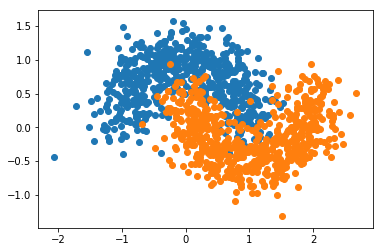

In [232]:
#plot the show 
plt.scatter(X[y == 0,0],X [y == 0,1])
plt.scatter(X[y == 1,0],X [y == 1,1])
plt.show()

In [233]:
# try to split data into test and train data sets 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y)

## 1. EnsembleLearning Classifier 

In [234]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression 
log_clf  = LogisticRegression()
log_clf.fit(X_train,y_train)
#log_clf.score(X_test,y_test) # 0.83

# SVM
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train,y_train)
#svc_clf.score(X_test,y_test) #0.98

# Decision Tree
from sklearn.tree import DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier(random_state = 100) # max_depth = 2,criterion = 'gini'
dt_clf.fit(X_train,y_train)
#dt_clf.score(X_test,y_test) # 1.0

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [235]:
## test on data sets 
log_clf.score(X_test,y_test) # 0.88


0.8766666666666667

In [236]:
svc_clf.score(X_test,y_test) #0.94


0.9233333333333333

In [237]:
dt_clf.score(X_test,y_test) # 0.92

0.9233333333333333

### 1.1 Ensemble Leaning 

### 1.1.1集成学习的效果- 人多力量大，明显比单个分类器的分类结果准确率要高

In [238]:
predict_1 = log_clf.predict(X_test)
predict_2 = svc_clf.predict(X_test)
predict_3 = dt_clf.predict(X_test)

# 
predict_y = np.array((predict_1 + predict_2 + predict_3) >=2 ,dtype = 'int')


In [239]:
predict_y[:10]

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [240]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict_y)

0.9233333333333333

## 2. Voting Classifier  - Hard Voting - 少数服从多数准则

In [200]:
# Harding voting - 少数服从多数
from sklearn.ensemble import VotingClassifier 

voting_clf_hard = VotingClassifier(estimators = [
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC()),
    ('dt_clf',DecisionTreeClassifier(random_state = 200))], voting = 'hard') 

In [207]:
# test score by hard voting classifier 
voting_clf_hard.fit(X_train,y_train)
voting_clf_hard.score(X_test,y_test)

c:\users\h155809\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9133333333333333

## 3. Voting Classifier  - Soft Voting -考虑以分类的概率作为权值 来分类

In [215]:
from sklearn.ensemble import VotingClassifier 

voting_clf_soft = VotingClassifier(estimators = [
    ('log_clf', LogisticRegression()),
    ('svc_clf',SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier(random_state = 200))],voting = 'soft')

In [216]:
voting_clf_soft.fit(X_train,y_train)
voting_clf_soft.score(X_test,y_test)

c:\users\h155809\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9133333333333333

## 4. 放回的取样方法 - Bagging

In [226]:
# 提高子模型的差异可以提高整体模型的准确率，并且可以让模型看不同数量的样本数量。
# 在取样本时，分为放回取样方法- Bagging and 不放回取样 pasting 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [248]:
# 以DecisionTree 为例
# n_estimators : 集成多少个分类器模型
# max_sample: 分类器一次看多少数据
# bootstrap = True： 可放回取样

bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 100,max_samples = 100, bootstrap = True
)

bagging_clf.fit(X_train,y_train)
bagging_clf.score(X_test,y_test)

0.9266666666666666

### 4.1 放回取样方法Bagging - Out of Bag(OOB) 有大约30%的数据取不到

In [250]:
# 有放回的取样本，并通过 oob_score = True 来确定标记没有被取到的样本数量。并将这些样本用于测试样本准确度
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 100,max_samples = 100, bootstrap = True,oob_score = True
)

bagging_clf.fit(X_train,y_train)
bagging_clf.score(X_test,y_test)

0.9366666666666666

In [251]:
# test model on out of bag data
bagging_clf.oob_score_

0.9388888888888889

### 4.2 放回取样方法Bagging - Out of Bag(OOB) - 基于样本特征的取样方法 - bootstrap_features

In [ ]:
##  有放回的取样本 , 基于样本特征的取样方法，并标记最大取样特征数量max_features
##

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# max_features - 每次取样特征数量
# bootstrap_features = True 基于特征的取样方法

bagging_clf_features = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 100,max_samples = 100, bootstrap = True,oob_score = True,max_features = 2, bootstrap_features = True
)

bagging_clf_features.fit(X_train,y_train)
bagging_clf_features.score(X_test,y_test)

0.9333333333333333

In [257]:
# test model on out of bag data 
bagging_clf_features.oob_score_

0.9322222222222222